In [1]:
state = 'IA' 
year = 2020
obj_type = 'cut_edges'
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of IA has 4 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from IA_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 5000 plans from file.


In [6]:
from epsilon_constraint import epsilon_constraint_method
import time

start_time = time.perf_counter()
(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity = 'lcut',                                             # {'lcut', 'scf', 'shir'} 
            cutoff=None,       
            verbose= True,
            warm_start_mode = 'user',                                        # {'None', 'user', 'refinement'}
            warm_starts=warm_starts,                                         # if you have user define warm starts else it is None
            starting_deviation=starting_deviation, 
            time_limit=7200, 
            sizes=None,      
            max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
            symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
            state=state,
            year=year
        )
print("Total time for epsilon constraint method =", round(time.perf_counter() - start_time, 2))

Initially, L = 789617 and U = 805568 and k = 4.

****************************************
Trying deviation = 7975.922500000001
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 2, 8, 20, 21, 22, 27, 41, 59, 60, 65, 68, 71, 76, 78, 79, 84, 92], [5, 6, 7, 11, 13, 15, 29, 34, 36, 45, 51, 56, 69, 74, 75, 77, 80, 82, 85, 87, 88, 90], [3, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 61, 67, 72, 83, 86, 94, 95, 96, 97, 98], [0, 4, 9, 10, 14, 16, 17, 19, 23, 30, 31, 32, 33, 35, 37, 40, 42, 43, 49, 50, 52, 53, 55, 57, 58, 62, 63, 64, 66, 70, 73, 81, 89, 91, 93]]
Objective value: 32
Deviation: 5691.75

****************************************
Running labeling model!
****************************************
L = 789617 and U = 805568
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1, 1, 1]
Solving the max B problem (as MIP) for use in the vertex

  4057  1184   30.97321   13  440   33.00000   24.31070  26.3%   246   30s
  4497  1245     cutoff   13        33.00000   24.68464  25.2%   251   35s
  5042  1250     cutoff   12        33.00000   25.06893  24.0%   261   41s
  5324  1299 infeasible   15        33.00000   25.14889  23.8%   262   45s
  5932  1362   30.58237   13  484   33.00000   25.48833  22.8%   265   50s
  6583  1380   31.12420   18  552   33.00000   25.86619  21.6%   269   55s
  7331  1397   30.41441    9  611   33.00000   26.12911  20.8%   271   61s
  7834  1412 infeasible   15        33.00000   26.32652  20.2%   276   66s
  8450  1420   31.56331   13  413   33.00000   26.61540  19.3%   276   71s
  8942  1428   30.55856   17  604   33.00000   26.77631  18.9%   278   76s
  9640  1420 infeasible   16        33.00000   27.05457  18.0%   279   82s
 10045  1421   30.15037   13  529   33.00000   27.26128  17.4%   278   85s
*10106  1293              43      32.0000000   27.26128  14.8%   278   85s
 10863  1103 infeasible  

Thread count was 20 (of 20 available processors)

Solution count 2: 32 33 

Optimal solution found (tolerance 0.00e+00)
Best objective 3.200000000000e+01, best bound 3.200000000000e+01, gap 0.0000%

User-callback calls 41390, time in user-callback 0.15 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[4, 8, 10, 16, 17, 49, 50, 93], [5, 6, 7, 11, 13, 15, 29, 34, 36, 45, 51, 56, 69, 74, 75, 77, 80, 82, 85, 87, 88, 90], [3, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 54, 61, 67, 72, 83, 86, 94, 95, 96, 97, 98], [0, 1, 2, 9, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 48, 52, 53, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 70, 71, 73, 76, 78, 79, 81, 84, 89, 91, 92]]

****************************************
Trying deviation = 4587.625
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 2, 8, 14, 20, 21, 22, 27, 41, 59, 60, 65, 68, 

Loaded user MIP start with objective 33

Presolve removed 2219 rows and 1794 columns
Presolve time: 0.04s
Presolved: 2532 rows, 2406 columns, 9189 nonzeros
Variable types: 0 continuous, 2406 integer (2378 binary)

Root relaxation: objective 1.104257e+01, 2910 iterations, 0.16 seconds (0.12 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   11.04257    0  481   33.00000   11.04257  66.5%     -    0s
     0     0   11.42694    0  494   33.00000   11.42694  65.4%     -    0s
     0     0   11.53054    0  496   33.00000   11.53054  65.1%     -    0s
     0     0   11.74202    0  507   33.00000   11.74202  64.4%     -    0s
     0     0   11.74899    0  505   33.00000   11.74899  64.4%     -    0s
     0     0   11.74899    0  497   33.00000   11.74899  64.4%     -    1s
     0     0   11.82161    0  492   33.00000   11.82161  64.2%     -    1s
     0     0   11.86

 37661 32565 infeasible  180               -   25.03713      -   114   61s
 41463 34968   48.60534   44  398          -   25.35219      -   113   65s
 46490 40119   58.85605  108  169          -   25.95819      -   116   71s
 49856 43128   41.58059   57   82          -   25.95819      -   116   76s
 54736 47044   31.04853   23  506          -   25.95819      -   116   81s
 59268 49303   29.34901   25  486          -   25.95819      -   117   86s
 61638 53083   44.89109   44   86          -   26.59634      -   118   92s
 64377 54884   41.96364   33  400          -   26.59634      -   118   95s
 67717 58357   37.90328   27  237          -   26.72126      -   119  100s
H69214 24805                      48.0000000   26.72126  44.3%   119  100s
 71256 25305     cutoff   38        48.00000   27.20491  43.3%   120  105s
 74880 26609   33.24675   25  553   48.00000   27.62354  42.5%   123  112s
H74963 16670                      44.0000000   27.62354  37.2%   123  112s
 74968 17217   34.18088  

 267738 25539 infeasible   31        36.00000   32.90871  8.59%   177  595s
 269878 25154     cutoff   34        36.00000   32.96628  8.43%   177  603s
 272074 24805   33.56632   42  309   36.00000   33.01922  8.28%   177  607s
 274358 24401   34.03539   44  223   36.00000   33.06498  8.15%   177  613s
 276568 23890 infeasible   33        36.00000   33.11807  8.01%   177  618s
 278709 23405 infeasible   32        36.00000   33.17140  7.86%   177  623s
 280902 22768   34.17174   44  210   36.00000   33.23285  7.69%   177  627s
 283086 22059 infeasible   60        36.00000   33.29848  7.50%   177  631s
 287174 20320 infeasible   29        36.00000   33.41198  7.19%   177  638s
 289160 19304     cutoff   60        36.00000   33.46989  7.03%   177  642s
 291265 18335   33.72870   43  293   36.00000   33.54970  6.81%   177  646s
 293019 17151 infeasible   27        36.00000   33.60230  6.66%   177  650s
 297260 14490     cutoff   35        36.00000   33.76574  6.21%   177  658s
 299392 1301

 135776 114993   51.09380   41  224          -   25.83871      -  96.3  230s
 139531 118414   63.81606   58   84          -   25.92072      -  96.6  235s
 143899 121520   38.52307   27  467          -   25.92072      -  96.7  241s
 148145 125112   48.47782   53  188          -   25.92072      -  96.8  247s
H150202 11357                      37.0000000   25.92072  29.9%  96.8  247s
H150302  8342                      36.0000000   25.92072  28.0%  96.8  250s
 152384  8709 infeasible   23        36.00000   26.53335  26.3%  98.4  256s
 153464  8802     cutoff   27        36.00000   26.70521  25.8%  99.2  262s
 153733  8850   32.51488   35  395   36.00000   26.73272  25.7%  99.4  265s
 154637  9005     cutoff   32        36.00000   26.79007  25.6%   100  270s
 156074  9194   33.34187   28  438   36.00000   27.00801  25.0%   101  275s
 157571  9368   34.16923   23  397   36.00000   27.21392  24.4%   102  280s
 159062  9553     cutoff   27        36.00000   27.36778  24.0%   103  286s
 160694 


Root relaxation: objective 1.114317e+01, 2887 iterations, 0.14 seconds (0.13 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   11.14317    0  482          -   11.14317      -     -    0s
     0     0   11.77436    0  497          -   11.77436      -     -    0s
     0     0   11.83589    0  502          -   11.83589      -     -    0s
     0     0   11.89982    0  499          -   11.89982      -     -    0s
     0     0   11.89982    0  497          -   11.89982      -     -    1s
     0     0   12.05691    0  503          -   12.05691      -     -    1s
     0     0   12.09254    0  502          -   12.09254      -     -    1s
     0     0   12.09254    0  501          -   12.09254      -     -    1s
     0     0   12.09425    0  497          -   12.09425      -     -    1s
     0     0   12.09479    0  488          -   12.09479      -     -    1s
     0  

 287779 237808   36.19265   30  380          -   28.25289      -   100  475s
 291473 240444   38.70318   28  399          -   28.25289      -   100  482s
 292783 241976   46.53671   52  213          -   28.25289      -   101  485s
 295895 244416   52.95012   49   94          -   28.34482      -   101  491s
 298634 247332   40.33265   45  271          -   28.34482      -   101  498s
 301040 249095   39.22746   27  384          -   28.34482      -   101  502s
 303176 250660   51.04711   62  430          -   28.34482      -   101  506s
 306939 253502   45.67079   65  201          -   28.34482      -   101  513s
 308485 255139   39.82871   33  425          -   28.34482      -   101  517s
 310544 256607   55.16023   57  199          -   28.34482      -   101  521s
 312241 257981   42.95558   30  475          -   28.34482      -   101  525s
 314267 259918   57.28240   74  162          -   28.51505      -   101  534s
 316302 261487   38.66124   34  131          -   28.52800      -   101  539s

 490353 403579   44.65468   37  134          -   29.53803      -   106 1020s
 494046 406231   34.71348   22  519          -   29.57076      -   106 1029s
 495515 407646   47.32113   34  318          -   29.57076      -   106 1034s
 497261 409100 infeasible  100               -   29.57076      -   106 1038s
 499002 410451   38.48723   37  260          -   29.57076      -   106 1043s
 500653 411527   35.42294   31  455          -   29.57076      -   106 1048s
 502088 413058   43.87500   49  191          -   29.57076      -   106 1053s
 503942 414579   37.16501   48  141          -   29.57076      -   106 1057s
 505802 416066   39.95186   24  374          -   29.57076      -   106 1063s
 507624 417465   58.26053   60  153          -   29.57076      -   106 1067s
 509308 418277   35.60613   32  498          -   29.57076      -   106 1072s
 510303 419565   37.61259   39  448          -   29.57076      -   106 1077s
 511893 421030   30.10992   27  147          -   29.57076      -   106 1081s

 675287 553973   62.71977   50  175          -   30.29551      -   109 1579s
 677003 555174   40.51553   28  497          -   30.29551      -   109 1583s
 678475 556475   57.01068   76   67          -   30.29551      -   109 1590s
 681741 559400   46.06471   34  211          -   30.29551      -   109 1600s
 685178 561705   55.40492   64  136          -   30.31275      -   109 1610s
 686332 563179   36.36224   27  591          -   30.31275      -   109 1616s
 688147 564625   46.83642   35  557          -   30.31275      -   109 1621s
 689916 566073   68.80446   89   92          -   30.31275      -   109 1627s
 691667 567460   49.15992   43  246          -   30.33428      -   109 1632s
 693389 569071   34.83168   31  516          -   30.33428      -   109 1638s
 695288 570539   54.79681   83  199          -   30.33428      -   109 1643s
 697139 571242   46.63600   49  201          -   30.33428      -   109 1649s
 697946 572648   47.55812  110  118          -   30.37158      -   109 1654s

 857082 700924   40.62798   22  445          -   30.83755      -   111 2209s
 857396 702262   52.07962   34  258          -   30.83755      -   111 2215s
 859063 703605   40.99934   35  489          -   30.87054      -   111 2220s
 860661 705073   49.39612   48  435          -   30.87532      -   111 2225s
 862393 706438   63.87229   86   74          -   30.87605      -   111 2230s
 864145 707751   44.96936   31  363          -   30.87952      -   111 2236s
 865640 709082   57.03180   82  182          -   30.87952      -   111 2241s
 867397 710201   42.87935   38  252          -   30.87952      -   111 2247s
 868891 711522   39.62802   30  304          -   30.87952      -   111 2253s
 870614 712705   47.26269   57  166          -   30.87952      -   111 2258s
 872145 714275   37.89312   27  585          -   30.87952      -   111 2264s
 874137 715677   34.44097   29  408          -   30.89154      -   111 2269s
 875833 716994   46.81997   55  122          -   30.89154      -   111 2275s

 1030365 842704   41.11496   32  562          -   31.26070      -   113 2827s
 1032382 844215   53.40656   58  326          -   31.26070      -   113 2832s
 1034241 844732   48.22830   48  163          -   31.26070      -   113 2839s
 1034835 846195   62.31933   61  192          -   31.26070      -   113 2845s
 1036592 847340   39.23749   26  529          -   31.26070      -   113 2850s
 1038003 848877   68.45239   42  369          -   31.26070      -   113 2857s
 1039937 850357   35.77180   40  409          -   31.26070      -   113 2862s
 1041824 851974   42.60561   62  150          -   31.27151      -   113 2869s
 1043823 853282   46.15952   67  307          -   31.27151      -   113 2874s
 1043893 853282   35.97867   34  435          -   31.27151      -   113 2875s
 1045466 854643   58.85216   89  292          -   31.27151      -   113 2882s
 1047161 856213   39.40134   35  330          -   31.27151      -   113 2887s
 1049094 857426   49.98665   65  247          -   31.30447      

 1206505 984236   36.82227   31  346          -   31.59955      -   114 3476s
 1208281 985687   49.37481   43  238          -   31.59955      -   114 3483s
 1210272 987037   58.64496   70  245          -   31.59955      -   114 3487s
 1212089 988343   41.86564   40  226          -   31.59955      -   114 3494s
 1213702 989923   44.41152   93  168          -   31.59955      -   114 3498s
 1215671 991269   43.68347   60  180          -   31.62018      -   114 3505s
 1217573 991575   40.07453   34  388          -   31.62373      -   114 3513s
 1217931 993161   47.60888   40  350          -   31.62373      -   114 3521s
 1219992 994566   35.87115   26  340          -   31.62379      -   114 3526s
 1221725 996244   80.59153   95  146          -   31.62379      -   114 3533s
 1223846 997500   46.69524   37  148          -   31.62772      -   114 3538s
 1225399 998970 infeasible   94               -   31.62772      -   114 3545s
 1227242 1000049   44.41799   58  246          -   31.62772     

 1323957 64513     cutoff   26        38.00000   32.11872  15.5%   116 4073s
 1325034 64676   35.50384   28  299   38.00000   32.12812  15.5%   116 4078s
 1326026 64727     cutoff   33        38.00000   32.14512  15.4%   116 4085s
 1326746 64897   32.99831   23  378   38.00000   32.15980  15.4%   116 4090s
 1327747 65030   37.00000   29  344   38.00000   32.17251  15.3%   116 4095s
 1328633 65114   35.44327   33  430   38.00000   32.18387  15.3%   116 4102s
 1329376 65241   34.33673   29  530   38.00000   32.19367  15.3%   116 4107s
 1330314 65453   35.82660   30  317   38.00000   32.20560  15.2%   116 4112s
 1331453 65616     cutoff   26        38.00000   32.22070  15.2%   116 4119s
 1332224 65778 infeasible   21        38.00000   32.23135  15.2%   116 4124s
 1333235 65924   32.42675   26  511   38.00000   32.24256  15.2%   116 4130s
 1334299 65981   34.94412   33  480   38.00000   32.25157  15.1%   116 4137s
 1335050 66190   36.12084   28  520   38.00000   32.26502  15.1%   116 4142s

 1447752 52432     cutoff   23        37.00000   33.47768  9.52%   120 4807s
 1449760 52143 infeasible   27        37.00000   33.50337  9.45%   120 4819s
 1451769 51845     cutoff   27        37.00000   33.52683  9.39%   120 4832s
 1453871 51588     cutoff   29        37.00000   33.54718  9.33%   120 4844s
 1455990 51310 infeasible   45        37.00000   33.57856  9.25%   120 4857s
 1458091 50964   34.99862   26  475   37.00000   33.60414  9.18%   120 4868s
 1460131 50643 infeasible   31        37.00000   33.62698  9.12%   120 4883s
 1461878 50227     cutoff   29        37.00000   33.65336  9.04%   120 4895s
 1464036 49855 infeasible   36        37.00000   33.67710  8.98%   120 4907s
 1466027 49484     cutoff   26        37.00000   33.70698  8.90%   121 4919s
 1468085 49310     cutoff   37        37.00000   33.72743  8.84%   121 4932s
 1469131 48846 infeasible   41        37.00000   33.73628  8.82%   121 4946s
 1471470 48510 infeasible   57        37.00000   33.77326  8.72%   121 4961s

 10214  7214   48.05107   47  109          -   19.36856      -   114   25s
 14097 10886   63.47428  151   56          -   19.36856      -   103   30s
 17061 13837   48.65851   64  128          -   19.36856      -   101   35s
 21926 18271   61.35684  137   31          -   19.36856      -  95.8   40s
 26011 21939   52.06213   49  376          -   19.36856      -  93.1   46s
 27698 23435   54.33047   97  123          -   19.36856      -  92.4   50s
 32789 28164   54.15541   55  201          -   20.47585      -  91.7   56s
 36075 29963   38.60253   29  440          -   22.63226      -  90.8   60s
 40319 34657   43.54900   27  236          -   23.06717      -  91.0   66s
 44960 38171   45.90477   41  210          -   23.06717      -  89.3   71s
 48674 41350   49.94438   47  198          -   23.06717      -  88.6   76s
 52482 45570   54.09418   50  326          -   23.76971      -  88.5   81s
 57578 48376   49.62505   67   63          -   23.76971      -  87.8   87s
 58233 50775   52.45627  

 384817 320580   51.41412   87  105          -   29.88647      -  91.4  566s
 388589 323703   55.99139   84  131          -   29.96202      -  91.5  571s
 392677 327023   35.20401   29  408          -   29.96202      -  91.6  577s
 394516 327297   44.93279   53  148          -   30.00044      -  91.6  581s
 394817 329150   44.71125   55  247          -   30.00044      -  91.7  585s
 399061 332474   49.98604   94  137          -   30.00044      -  91.7  591s
 402752 335460   37.07285   30  449          -   30.00044      -  91.8  597s
 404594 337256   46.19105   67  251          -   30.00044      -  91.8  600s
 408952 340674 infeasible  118               -   30.05911      -  91.8  606s
 412810 344083   31.77124   31  379          -   30.06730      -  91.9  612s
 414835 345754   37.27266   75  139          -   30.08732      -  91.9  615s
 418588 348913   55.45212   76  260          -   30.08732      -  92.0  622s
 420676 350493   55.74280   49  296          -   30.11532      -  92.0  625s

 670334 555331   38.01836   32  332          -   31.07455      -  94.9 1102s
 672163 556593   38.17807   27  368          -   31.07455      -  94.9 1106s
 673621 558431   49.48892   51  259          -   31.12703      -  94.9 1110s
 677900 561886   56.12212   98   54          -   31.12703      -  94.9 1117s
 680167 563343   57.82668   48  431          -   31.12703      -  94.9 1120s
 681940 564917   42.14217   32  248          -   31.12703      -  95.0 1125s
 685587 568220   48.12619   72  259          -   31.12703      -  95.0 1132s
 687711 569836   48.50133   34  315          -   31.16524      -  95.0 1136s
 691570 572651   55.11365   48  331          -   31.16524      -  95.0 1143s
 693133 574369   73.29485   89   94          -   31.16524      -  95.1 1147s
 695241 575181   42.78954   35  369          -   31.18860      -  95.1 1151s
 696195 576728   45.43650   40  359          -   31.18860      -  95.1 1155s
 699778 579699   56.15529   46  203          -   31.19698      -  95.1 1163s

 910960 751296   63.87166   72   66          -   31.65836      -  96.6 1645s
 914796 754366   37.17355   44  242          -   31.65836      -  96.6 1653s
 916843 755898   55.30703   95  244          -   31.65836      -  96.6 1657s
 918742 757434   40.01491   37  154          -   31.65836      -  96.6 1663s
 920782 759108   58.26923   92  208          -   31.67845      -  96.6 1667s
 922797 760721   37.05841   30  481          -   31.67890      -  96.6 1671s
 924683 762190   45.00931   54  314          -   31.67890      -  96.6 1675s
 927119 763369   52.57038   53  260          -   31.67890      -  96.7 1680s
 929897 766618   57.49692  119   67          -   31.67890      -  96.7 1687s
 931980 768194   45.50873   51  391          -   31.70825      -  96.7 1691s
 933945 769718   35.28763   22  541          -   31.70825      -  96.7 1696s
 935838 769925   47.88943   49  190          -   31.70825      -  96.7 1702s
 936095 771614   42.98129   52  368          -   31.70825      -  96.7 1707s

 1124042 925049   44.03170   64  153          -   32.03113      -  97.7 2195s
 1127843 928181   45.85429   41  247          -   32.04873      -  97.7 2203s
 1129996 929895   37.26794   34  329          -   32.04947      -  97.7 2208s
 1132093 931499 infeasible  101               -   32.04947      -  97.7 2214s
 1134131 932707   45.03958   40  272          -   32.04947      -  97.7 2219s
 1135648 934063   50.37660   78  180          -   32.06382      -  97.7 2223s
 1137227 935371   42.16029   45  298          -   32.06570      -  97.8 2228s
 1138963 935649   40.99496   31  286          -   32.06941      -  97.8 2235s
 1139247 937126   38.68589   33  285          -   32.06941      -  97.8 2240s
 1141051 938387   56.78776   99   72          -   32.07046      -  97.8 2245s
 1142572 939828   40.57780   38  497          -   32.07046      -  97.8 2250s
 1144391 941335   53.99909   56  196          -   32.07427      -  97.9 2255s
 1146335 942821   38.08511   29  345          -   32.07633      

 1322249 1085550   46.12273   78   90          -   32.30682      -  98.5 2773s
 1324095 1086951   36.84778   41  242          -   32.30682      -  98.5 2780s
 1327655 1089236   45.42350   44   92          -   32.30713      -  98.5 2790s
 1328665 1090422   37.63702   27  504          -   32.31235      -  98.6 2795s
 1330104 1092161   52.96082   41  109          -   32.31235      -  98.6 2803s
 1332362 1093276   64.31972   76   99          -   32.31839      -  98.6 2807s
 1333817 1094964   46.27377   60   91          -   32.32019      -  98.6 2814s
 1335913 1096346   38.27082   68  293          -   32.32209      -  98.6 2818s
 1337572 1097637   36.84561   42  295          -   32.32209      -  98.6 2824s
 1339186 1098729   47.29095   95  146          -   32.32209      -  98.6 2830s
 1342258 1101789   52.65278   62  202          -   32.32951      -  98.7 2839s
 1344426 1103338 infeasible   69               -   32.33767      -  98.7 2844s
 1346310 1104877   47.26609   53  190          -   3

 1508909 1235142   37.25219   29  467          -   32.52204      -  99.2 3392s
 1510633 1236496   54.56434   57  388          -   32.52204      -  99.2 3398s
 1512289 1238124   33.13643   54   72          -   32.52204      -  99.2 3406s
 1514323 1238396   44.27078   88   93          -   32.52204      -  99.2 3416s
 1514642 1239840   50.73993  101   87          -   32.52204      -  99.2 3423s
 1516476 1241338   49.37981   46  154          -   32.52204      -  99.2 3430s
 1518372 1242949   34.11152   35  330          -   32.52782      -  99.2 3435s
 1520292 1244550   42.44079   57  178          -   32.52782      -  99.2 3442s
 1522367 1245591   39.47884   54  306          -   32.52782      -  99.2 3448s
 1523644 1247294   50.48175   40  212          -   32.52782      -  99.2 3454s
 1525763 1248738   34.41198   24  406          -   32.52782      -  99.2 3458s
 1527582 1250217   48.21132   88   94          -   32.52782      -  99.2 3464s
 1529402 1251800   52.08763   51  143          -   3

 1688026 1378609   62.69056   99  133          -   32.69076      -   100 4134s
 1689658 1380138   57.62272   84  129          -   32.69076      -   100 4140s
 1691629 1381688   53.31028   73  117          -   32.69076      -   100 4148s
 1693520 1382665   51.92618   42  347          -   32.69076      -   100 4153s
 1694754 1384494   53.06192   56  254          -   32.69076      -   100 4161s
 1697203 1385889   34.14016   22  571          -   32.70688      -   100 4165s
 1698926 1387438   40.83331   50  182          -   32.70688      -   100 4172s
 1700876 1388910   40.63902   29  329          -   32.70934      -   100 4180s
 1702642 1390498   54.52860   52  194          -   32.71125      -   100 4186s
 1704565 1391873   36.56041   31  482          -   32.71125      -   100 4193s
 1706287 1393364   53.41676   60  196          -   32.71214      -   100 4201s
 1708098 1394267   39.93118   37  383          -   32.71214      -   100 4209s
 1709222 1395581   41.55050   51  257          -   3

 1860954 1516761   47.99116   37  342          -   32.83846      -   100 5148s
 1862851 1518230   64.08619   71   65          -   32.84231      -   100 5160s
 1864734 1519747   58.97185   50  216          -   32.84270      -   100 5172s
 1866581 1521131   46.85194   80  155          -   32.84270      -   100 5185s
 1868298 1521430   43.91811   32  557          -   32.84270      -   100 5204s
 1868621 1523109   44.45319   34  567          -   32.84270      -   100 5218s
 1870788 1524590   59.32297   61  288          -   32.84270      -   100 5231s
 1872658 1526043   35.78654   80  201          -   32.85073      -   100 5242s
 1874527 1527557   40.40309   32  318          -   32.85104      -   100 5255s
 1876416 1529221   65.67094   86   84          -   32.85104      -   100 5268s
 1878415 1530557   66.34505   89  136          -   32.85104      -   100 5278s
 1880162 1531936   56.21203   56  368          -   32.85575      -   100 5290s
 1881890 1533311   36.57918   30  267          -   3

 2035502 1656182   59.82254   69  135          -   32.97704      -   101 6482s
 2037359 1657759   42.68069   33  519          -   32.97810      -   101 6493s
 2039393 1659371   54.90777   96  252          -   32.98112      -   101 6501s
 2041275 1661048   47.32800   48  189          -   32.98112      -   101 6513s
 2043399 1662592   66.51477   94  100          -   32.98345      -   101 6525s
 2045361 1663593 infeasible   48               -   32.98470      -   101 6538s
 2046709 1665120   63.30177   87   71          -   32.98484      -   101 6549s
 2048291 1665120   48.65212   67  219          -   32.98484      -   101 6550s
 2048622 1666642   48.29038   47  128          -   32.98484      -   101 6559s
 2050592 1668099   35.57429   27  554          -   32.98642      -   101 6570s
 2052406 1669432   57.99276   54   43          -   32.98642      -   101 6580s
 2054022 1671030   45.82124   41  224          -   32.98642      -   101 6592s
 2056100 1672206   35.88274   30  323          -   3

In [7]:
result = list(zip(plans, obj_bounds , deviations))

In [8]:
no_solution_region = [0, min(round(r[2],1) for r in result)]
print(f"No feasible solution was found within the region: {no_solution_region}")

No feasible solution was found within the region: [0, 266.2]



####################################################################################################
Pareto Frontier for state IA,  objective cut_edges
####################################################################################################

Pareto front plans: [[[4, 8, 16, 17, 18, 49, 53, 93], [3, 12, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 61, 67, 68, 76, 78, 83, 86, 94, 95, 96, 97, 98], [6, 7, 10, 11, 15, 34, 45, 51, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [0, 1, 2, 5, 9, 13, 14, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 43, 50, 52, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 70, 71, 73, 74, 79, 81, 84, 89, 91, 92]], [[1, 2, 8, 14, 20, 21, 22, 27, 41, 59, 60, 65, 68, 71, 76, 78, 79, 84, 92], [3, 6, 10, 12, 13, 18, 24, 26, 28, 29, 34, 38, 39, 44, 45, 46, 48, 54, 67, 75, 83, 85, 86, 94, 95, 96, 97, 98], [0, 4, 9, 16, 17, 19, 23, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 49, 50, 52, 53, 55, 57, 58, 62, 63, 64, 66, 70, 73, 74, 81, 89, 91, 93], [

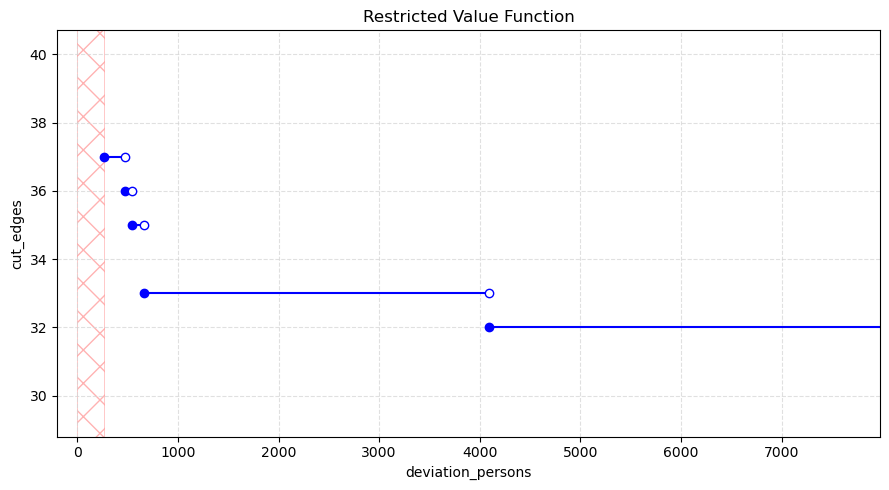

In [9]:
from pareto import plot_pareto_frontiers

plot_pareto_frontiers(
                G,
                method='epsilon_constraint_method',
                plans=None,                                   #if method ='epsilon_constraint_method' is None 
                obj_types=obj_type,                               
                ideal_population=G._ideal_population,
                state=state,
                filepath=filepath,
                filename2=filename2,
                no_solution_region=no_solution_region,
                year=year,
                result=result                               #if method ='heuristic' is None 
             )


####################################################################################################
Pareto maps for state IA, objective cut_edges
####################################################################################################



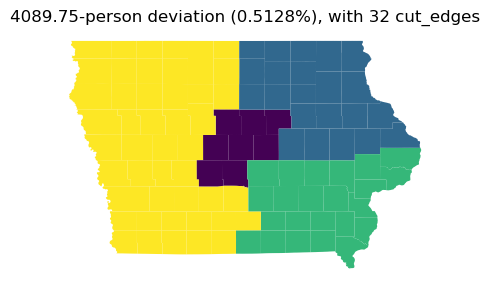

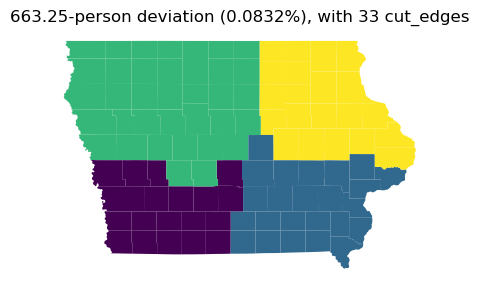

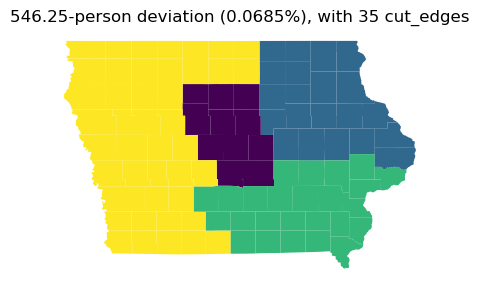

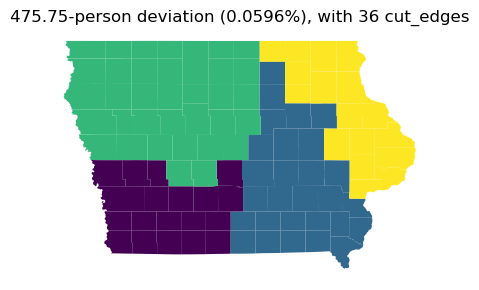

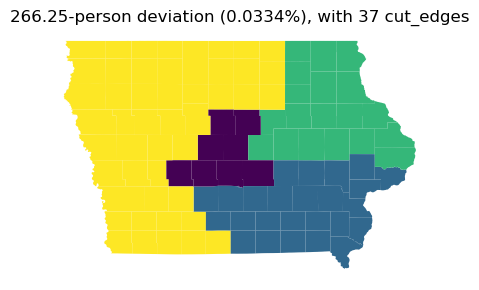

In [10]:
from draw import draw_plan
from metrics import observed_deviation_persons, compute_obj

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: int(x)}
G._L = 0
G._U = G._k * G._ideal_population

for plan, obj_bound, dev in result:
    obs_dev = observed_deviation_persons(G, plan, G._ideal_population)
    obj = compute_obj(G, plan, obj_type)
    obj_val = format_obj.get(obj_type, lambda x: round(x, 4))(obj)
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    title = f"{round(obs_dev, 2)}-person deviation ({deviation_percentage}%), with {obj_val} {obj_type}"
    draw_plan(filepath, filename2, G, plan, title=title, year=year)